In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

## Analysis of the invasion probability ratio

In [2]:
# these two string must be passed during the execution of invasion_prob.exe
data_dir = '../data/inv_prob/plotkin2/'

### Setting the parameters

In [4]:
params = dict()

# General parameters
params['process_type'] = 'plotkin2'
params['N_init_cond'] = 1000 # -- Number of trajectories at each threshold
params['relax_step'] = 1500 # -- Number of steps for the relaxation of the initial condition
params['thresholds'] = [2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 1000, 10000] 

# Fixed parameters
beta1 = 1
params['M'] = 400

# List of parameters
beta2 = np.array([1,2,3,4,5])
alphas = [1/3]

params['N_processes'] = len(beta2)*len(alphas)

### Writing the params

In [10]:
count = 1
for a in alphas:
    for b2 in beta2:
        params['betas'] = [beta1, b2]
        params['alpha'] = a
        params['carrying_cap'] = params['M'] * (1/a-1)
        ut.write_params(params, data_dir, str(count)+'_param.txt')
        params['betas'] = [b2, beta1]
        ut.write_params(params, data_dir, str(count)+'sw_param.txt')
        count += 1

### Importing the results and comparing with theory

In [5]:
plot_dir = '../plots/'

In [10]:
inv_p, inv_p_sw = [], []

count = 1
for i in range(len(beta2)):
    aux_p, aux_p_sw = [], []
    for a in range(len(alphas)):
        print(count)
        p = ut.read_params(data_dir + str(count) + '_param.txt')
        print(p['betas'], p['alpha'])
        aux_p.append(float(ut.read_inv_p(data_dir + str(count) + '_inv_p.txt')))
        print(aux_p[-1])
        p = ut.read_params(data_dir + str(count) + 'sw_param.txt')
        print(p['betas'], p['alpha'])
        aux_p_sw.append(float(ut.read_inv_p(data_dir + str(count) + 'sw_inv_p.txt')))
        print(aux_p_sw[-1])
        count+=1
    inv_p.append(aux_p)
    inv_p_sw.append(aux_p_sw)

    
inv_p = np.array(inv_p)
inv_p_sw = np.array(inv_p_sw)

1
[1. 1.] 0.3333333333333333
0.00139547
[1. 1.] 0.3333333333333333
0.00117252
2
[1. 2.] 0.3333333333333333
0.00154096
[2. 1.] 0.3333333333333333
0.000908772
3
[1. 3.] 0.3333333333333333
0.00219319
[3. 1.] 0.3333333333333333
0.000639459
4
[1. 4.] 0.3333333333333333
0.00238572
[4. 1.] 0.3333333333333333
0.000529552
5
[1. 5.] 0.3333333333333333
0.00208759
[5. 1.] 0.3333333333333333
0.000451037


In [11]:
inv_p_ratio = inv_p/inv_p_sw

In [14]:
def p_inv(b1, b2, carr_cap):
    return 2*b2/(b1+b2)/carr_cap

def p_inv_ratio(b1, b2):
    return b2/b1

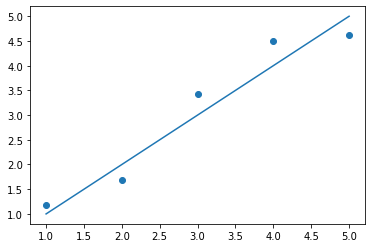

In [17]:
plt.scatter(beta2, inv_p_ratio)
plt.plot(beta2, p_inv_ratio(beta1,beta2))

In [48]:
def plotkin_inv_ratio(b1, b2):
    return b2/b1

def rogers_inv_ratio(b1, b2):
    return np.exp(-(b1/b2-b2/b1))

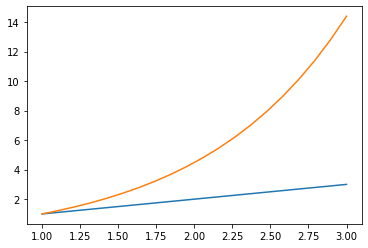

In [49]:
beta2s = np.linspace(1,3,20)
plt.plot(beta2s, plotkin_inv_ratio(1, beta2s))
plt.plot(beta2s, rogers_inv_ratio(1, beta2s))